In [176]:
import numpy as np

In [177]:
n=30
x1=np.random.uniform(-3.2,2,size=n)

In [178]:
b=[45,-6,1.2,-1,0.01]
hata=np.random.normal(0,4,size=n)

In [179]:
y=b[0] \
+b[1]*x1 \
+b[2]*x1**2 \
+b[3]*x1**3 \
+b[4]*x1**4 + hata

In [180]:
import matplotlib.pyplot as plt

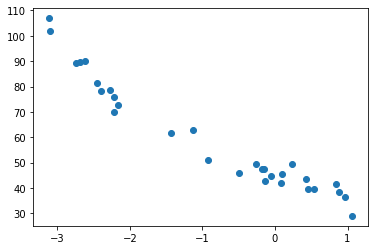

In [181]:
plt.scatter(x1,y)

In [182]:
from sklearn.tree import DecisionTreeRegressor

In [183]:
decision_tree = DecisionTreeRegressor()

## Independent Variable `x1`

In [184]:
x1[:5]

array([-2.45258102, -0.15194973,  0.10022295, -3.11199666, -0.49418442])

## Dependent Variable `y`

In [185]:
y[:5]

array([ 81.46230737,  47.43789742,  45.64210254, 106.90312154,
        46.02513886])

Fitting the model:

In [186]:
decision_tree.fit(x1.reshape(-1,1), y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [187]:
decision_tree.score(x1.reshape(-1, 1), y)

1.0

## Plotting the model's decisions

In [188]:
x_range = np.linspace(x1.min(), x1.max(), 1500)

y_range = decision_tree.predict(x_range.reshape(-1, 1))

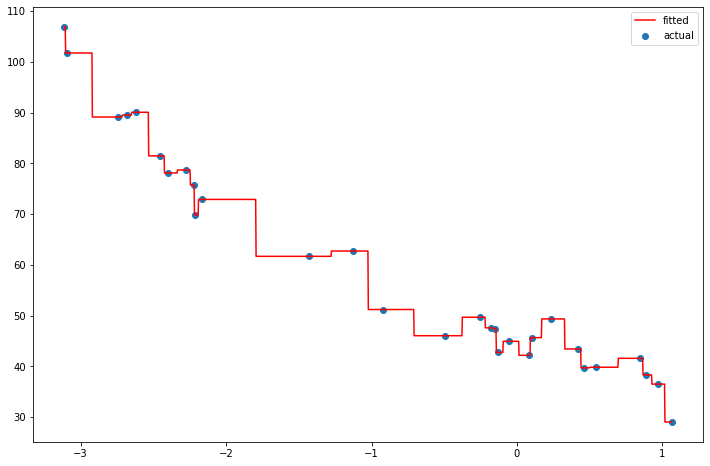

In [189]:
plt.figure(figsize=(12, 8))
plt.scatter(x1,y, label='actual')
plt.plot(x_range, y_range, label='fitted', color='red')
plt.legend()

In [190]:
x2=np.random.uniform(-3.2,2,size=30)
y2=b[0] \
+b[1]*x2 \
+b[2]*x2**2 \
+b[3]*x2**3 \
+b[4]*x2**4 + hata

In [112]:
model.score(x2.reshape(-1, 1), y2)

NameError: name 'model' is not defined

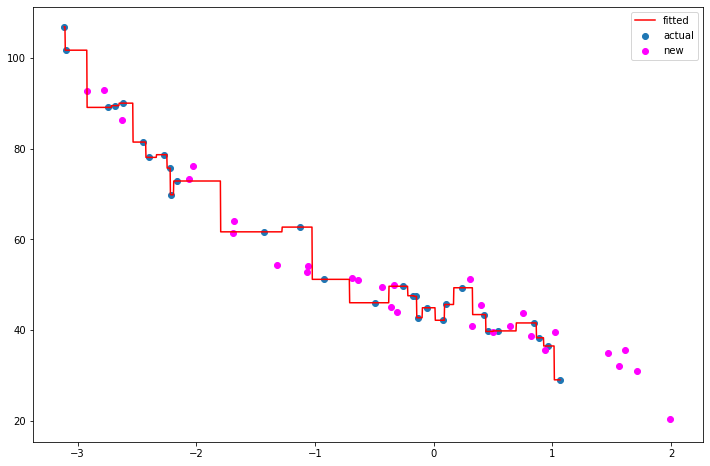

In [191]:
plt.figure(figsize=(12, 8))
plt.scatter(x1,y, label='actual')
plt.scatter(x2,y2, label='new', color='magenta')

plt.plot(x_range, y_range, label='fitted', color='red')
plt.legend()

In [192]:
import sklearn.model_selection as ms

## Splitting the data into train and test sets

In [193]:
# x1 ve y ile model kuruluyor
x1=x1.reshape(n,1)
y=y.reshape(n,1)
x1_train,x1_test,y_train,y_test = ms.train_test_split(x1,y,test_size=0.2, random_state=0)

In [194]:
decision_tree = DecisionTreeRegressor(max_depth=2)

In [195]:
decision_tree.fit(x1_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## Checking scores for train and test sets

In [196]:
decision_tree.score(x1_train, y_train)

0.9326790158319518

In [197]:
decision_tree.score(x1_test, y_test)

0.9419344817325861

In [198]:
depths = [10,9,8,7,6,5,4,3,2,1]

trains = []
tests = []

for d in depths:
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(x1_train, y_train)
    trains.append(decision_tree.score(x1_train, y_train))
    tests.append(decision_tree.score(x1_test, y_test))

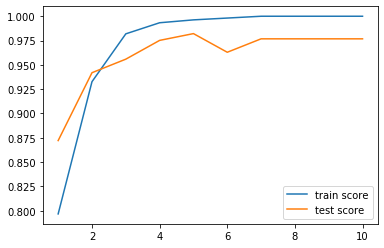

In [199]:
plt.plot(depths, trains, label='train score')
plt.plot(depths, tests, label='test score')
plt.legend()

In [200]:
decision_tree = DecisionTreeRegressor(max_depth=2)
decision_tree.fit(x1.reshape(-1, 1), y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

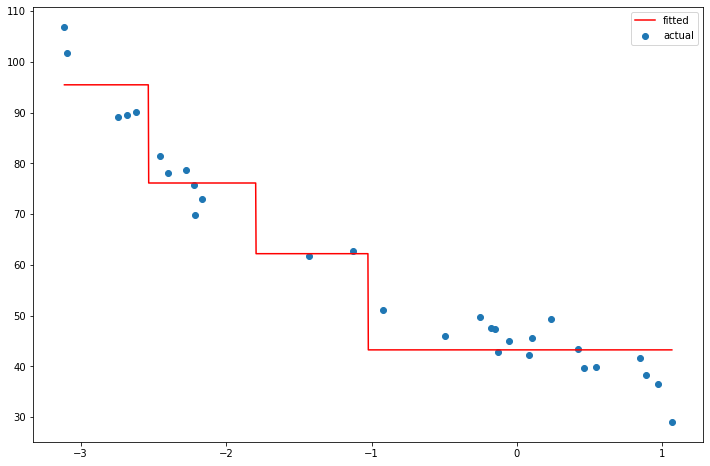

In [201]:
x_range = np.linspace(x1.min(), x1.max(), 1500)

y_range = decision_tree.predict(x_range.reshape(-1, 1))

plt.figure(figsize=(12, 8))
plt.scatter(x1,y, label='actual')
# plt.scatter(x2,y2, label='new', color='magenta')

plt.plot(x_range, y_range, label='fitted', color='red')
plt.legend()

In [202]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [203]:
degree=[1,2,3,4,5,6,7,8,9]
poli_train=[]
poli_test=[]
for dg in degree:
    poli_model=PolynomialFeatures(degree=dg,include_bias=False)
    xp=poli_model.fit_transform(x1_train)
    print(xp.shape)
    model=LinearRegression()
    model.fit(xp,y_train)
    poli_train.append(model.score(xp,y_train))
    poli_test.append(model.score(poli_model.transform(x1_test),y_test))

(24, 1)
(24, 2)
(24, 3)
(24, 4)
(24, 5)
(24, 6)
(24, 7)
(24, 8)
(24, 9)


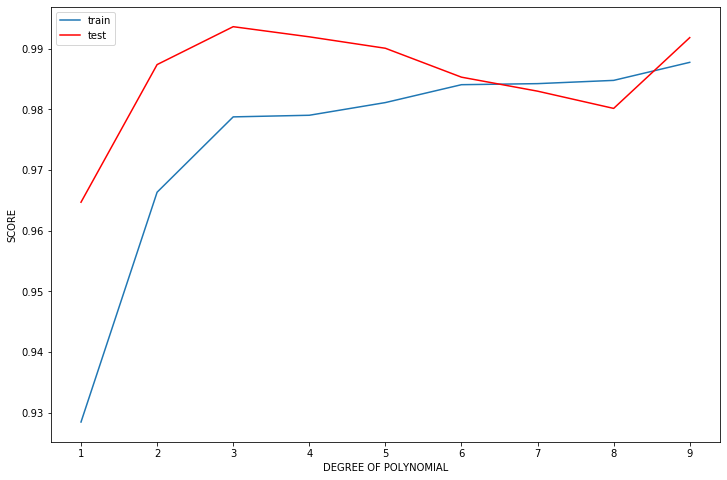

In [204]:
plt.figure(figsize=(12,8))
plt.plot(degree,poli_train,label='train')
plt.plot(degree,poli_test,color='red',label='test')
plt.xlabel('DEGREE OF POLYNOMIAL')
plt.ylabel('SCORE')
plt.legend()

In [205]:
poli_model_4=PolynomialFeatures(degree=4)
pm4=poli_model_4.fit_transform(x1_train)

In [206]:
linear_4=LinearRegression()

In [207]:
linear_4.fit(pm4,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [208]:
linear_4.score(pm4,y_train)

0.9790401575086671

In [209]:
linear_4.score(poli_model_4.transform(x1_test),y_test)

0.9919698659006315

In [210]:
linear_4.intercept_

array([46.18142366])

In [211]:
linear_4.coef_

array([[ 0.        , -7.6181229 , -1.55656606, -2.28127259, -0.20090935]])

In [212]:
b

[45, -6, 1.2, -1, 0.01]

In [213]:
y_pred=linear_4.predict(pm4)

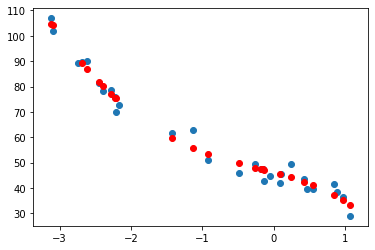

In [214]:
plt.scatter(x1,y)
plt.scatter(x1_train,y_pred,color='red')

In [215]:
x_range=np.linspace(-3.1,2.2,500).reshape(-1,1)

In [296]:
poli_model_2=PolynomialFeatures(degree=1)
pm2=poli_model_2.fit_transform(x1_train)
linear_2=LinearRegression()
linear_2.fit(pm2,y_train)
y_pred2=linear_2.predict(poli_model_2.transform(x_range))

In [297]:
poli_model_4=PolynomialFeatures(degree=4)
pm4=poli_model_4.fit_transform(x1_train)
linear_4=LinearRegression()
linear_4.fit(pm4,y_train)
y_pred4=linear_4.predict(poli_model_4.transform(x_range))

poli_model_12=PolynomialFeatures(degree=7)
pm12=poli_model_12.fit_transform(x1_train)
linear_12=LinearRegression()
linear_12.fit(pm12,y_train)
y_pred12=linear_12.predict(poli_model_12.transform(x_range))

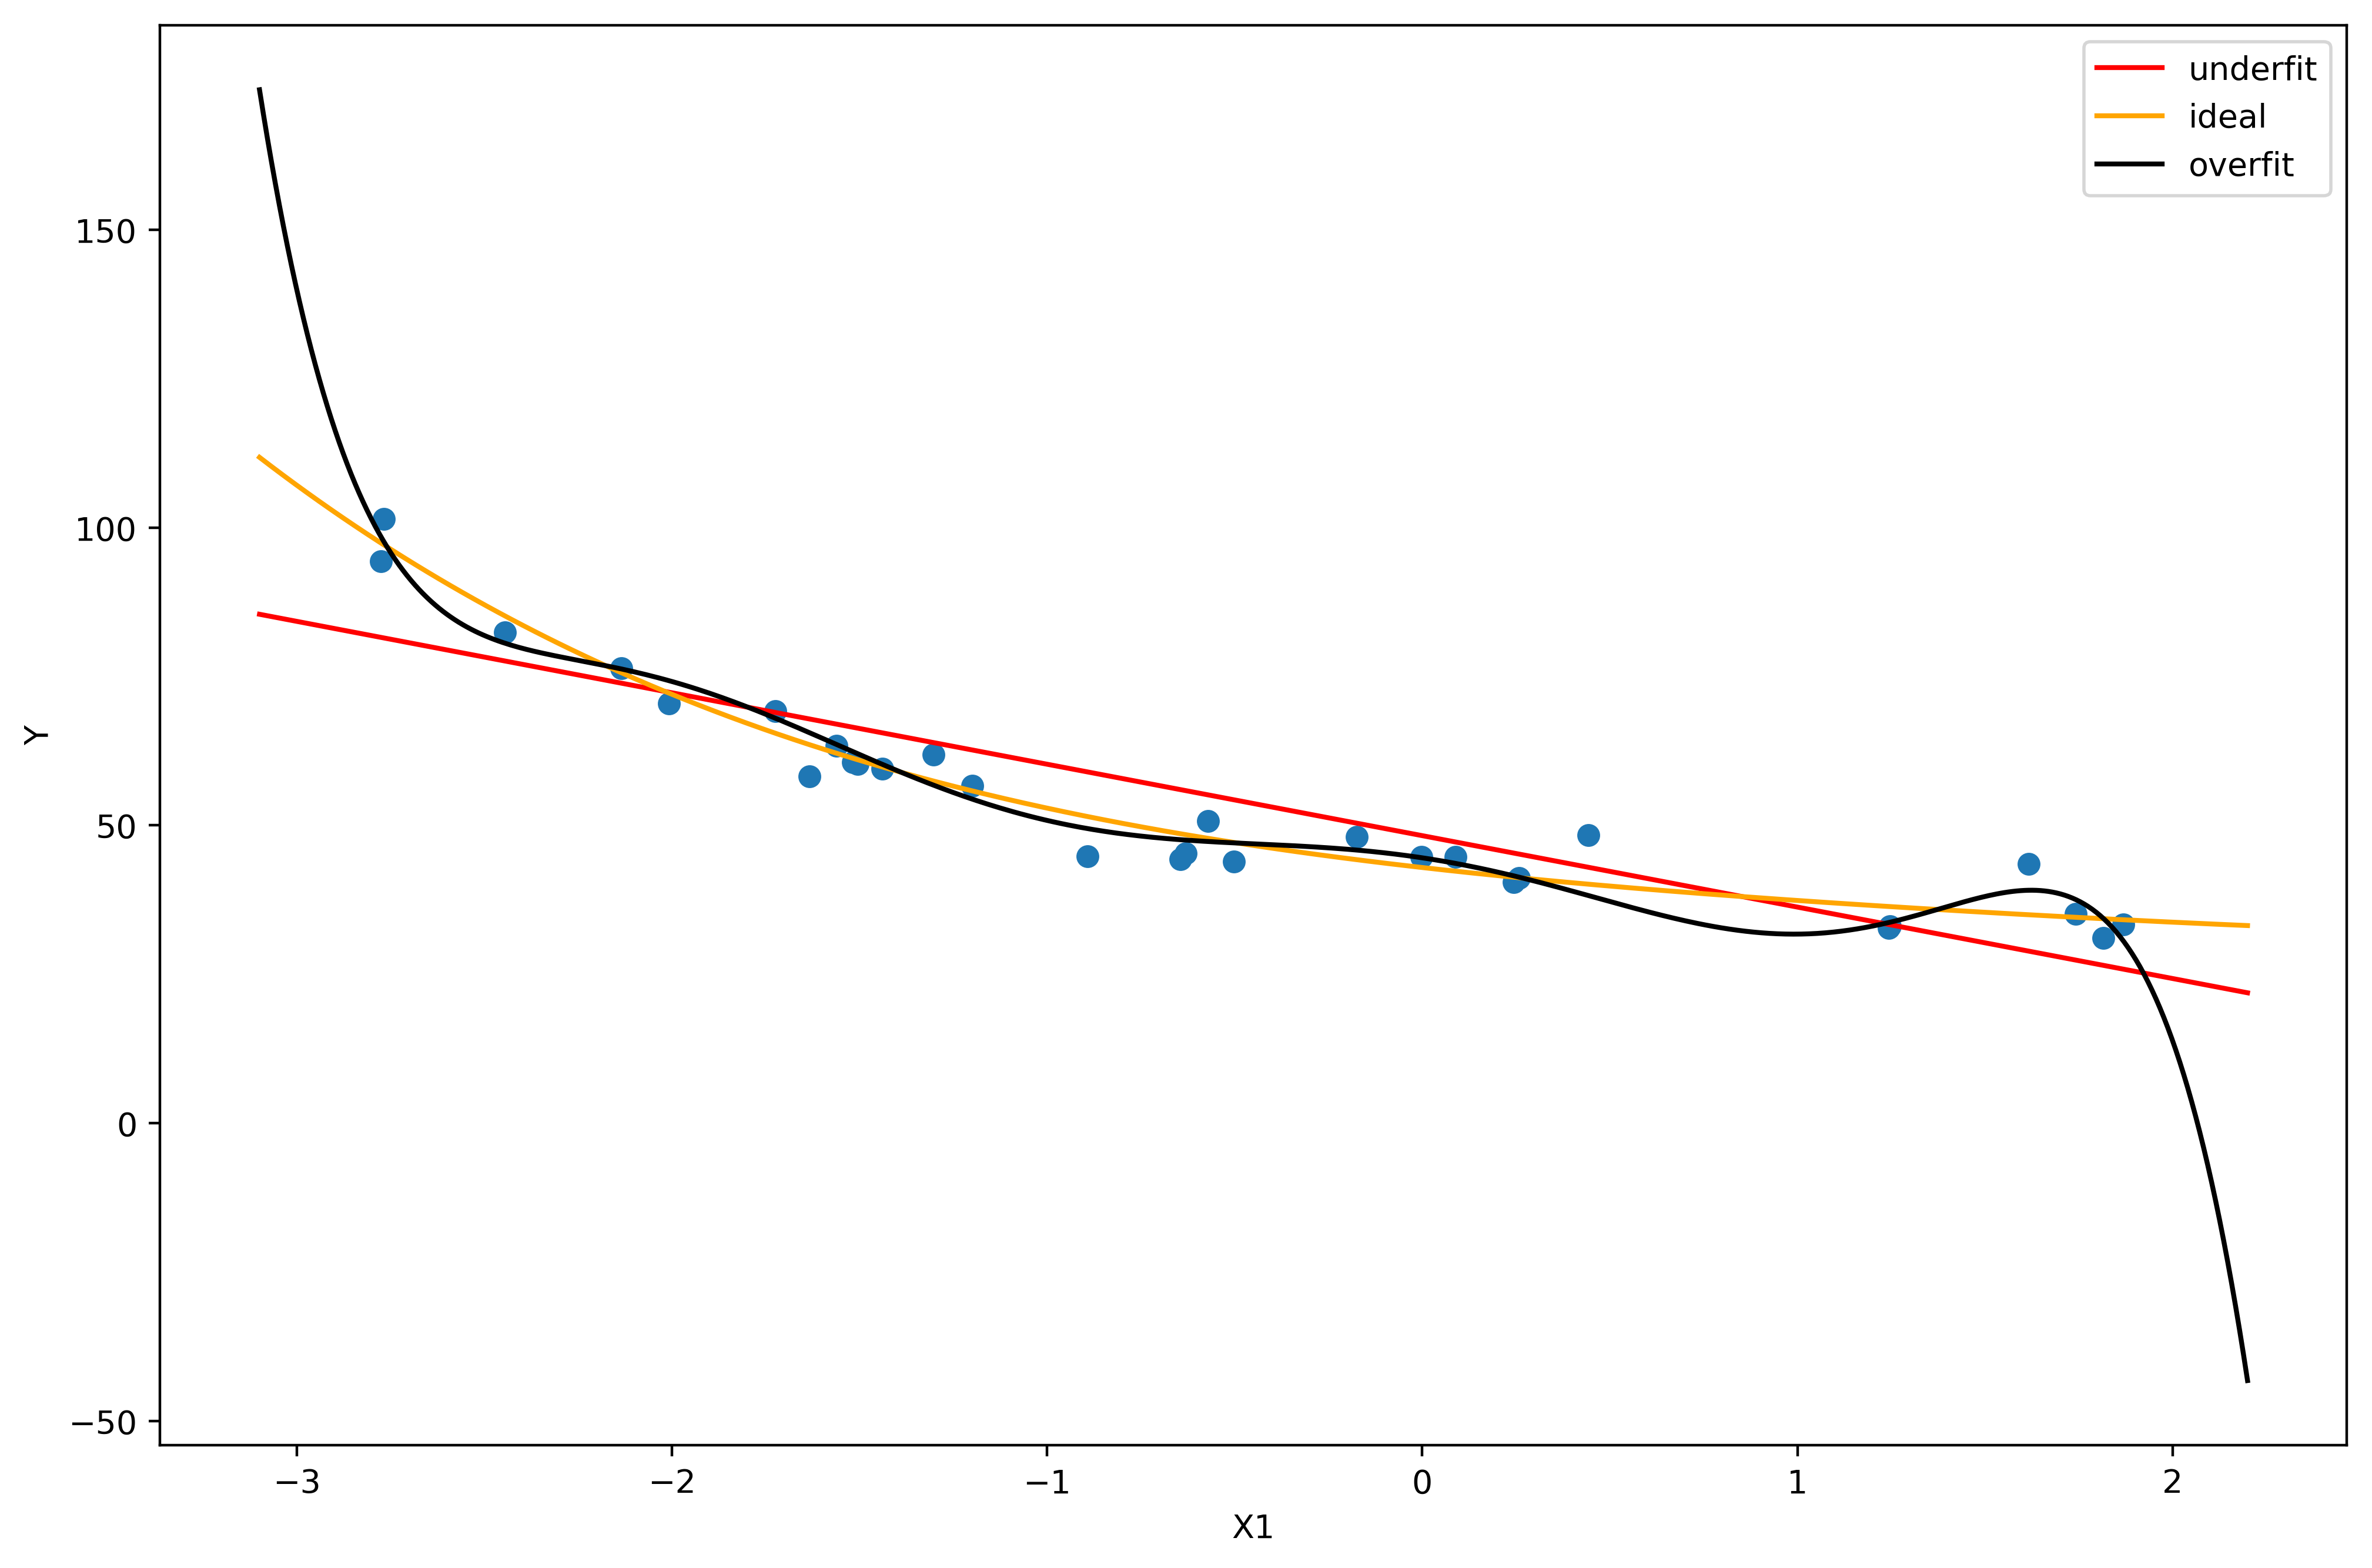

In [298]:
plt.figure(figsize=(12,8), dpi=400)
plt.scatter(x1,y)
plt.plot(x_range,y_pred2,color='red',label='underfit')
plt.plot(x_range,y_pred4,color='orange',label='ideal')
plt.plot(x_range,y_pred12,color='black',label='overfit')
plt.xlabel('X1')
plt.ylabel('Y')
plt.legend()

In [303]:
linear_12.intercept_

array([44.55649902])